In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [68]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve


In [74]:
df = pd.read_csv("D:\\Data science\\Final project\\bank\\bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [75]:
df.shape

(11162, 17)

In [76]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [77]:
df['age'].unique()

array([59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 29, 46, 31, 35, 32, 49,
       43, 26, 40, 33, 23, 48, 45, 36, 52, 53, 39, 57, 51, 44, 24, 50, 27,
       34, 47, 25, 58, 61, 68, 75, 22, 69, 66, 85, 72, 90, 67, 71, 21, 74,
       65, 62, 83, 70, 76, 77, 19, 73, 63, 20, 78, 95, 64, 79, 82, 18, 86,
       84, 87, 92, 81, 80, 93, 88, 89], dtype=int64)

In [78]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<AxesSubplot:xlabel='age'>

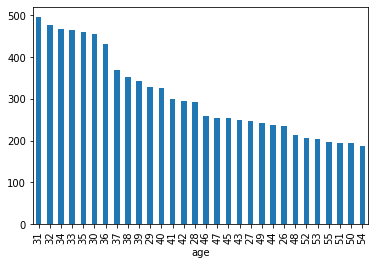

In [79]:
df1=df.groupby('age')['job'].count().sort_values(ascending=False).head(30)
df1.plot.bar()

<AxesSubplot:xlabel='education'>

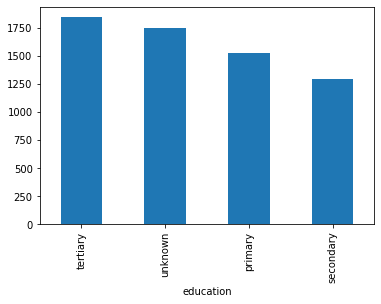

In [80]:
df1=df.groupby('education')['balance'].mean().sort_values(ascending=False).head(30)
df1.plot.bar()

<AxesSubplot:ylabel='loan'>

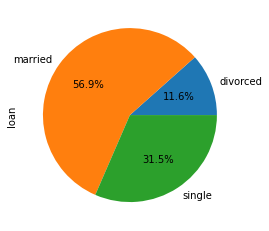

In [82]:
df.groupby('marital')['loan'].count().plot.pie(autopct="%1.1f%%")

In [84]:
df["pdays"].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

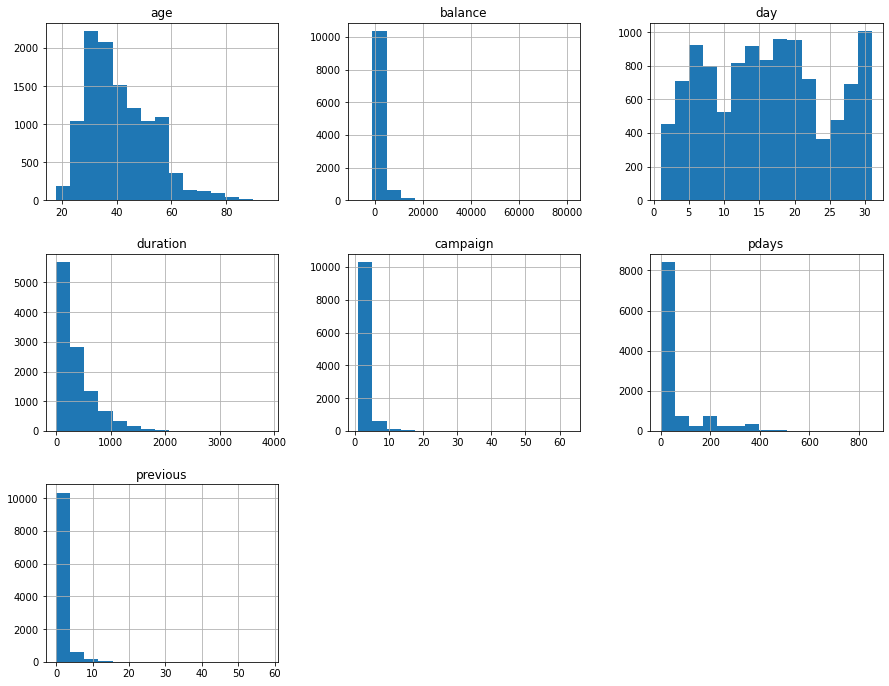

In [86]:
df[df.columns].hist(bins=15, figsize=(15, 16), layout=(4, 3));

In [87]:
df["deposit"] = np.where(df['deposit'] == "yes", 1, 0)

In [89]:
catg = ['job', 'marital', 'education', 'housing', 'loan',"default", 'contact', 'month',"poutcome"]
df= pd.get_dummies(df, columns=catg).drop(["pdays"], axis=1)
df.head()

,age,balance,day,duration,campaign,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


<AxesSubplot:>

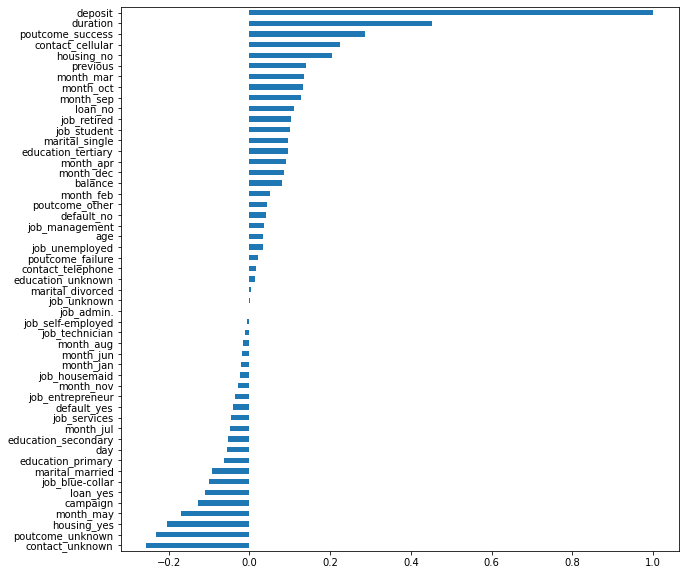

In [90]:
plt.figure(figsize=(10,10))
y = df.corr()['deposit'].sort_values(ascending = True)
y.plot(kind="barh")

In [93]:
X=df.drop('deposit',axis=1)
y=df['deposit']

#split into train and test (70,30)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=5)
print("Original:", df.shape,
      "\nX Train:",X_train.shape,
      "\nX Test:", X_test.shape,
      "\n",
      "\ny Train:", y_train.shape,
      "\ny Test:", y_test.shape)

Original: (11162, 51) 
X Train: (7813, 50) 
X Test: (3349, 50) 
 
y Train: (7813,) 
y Test: (3349,)


In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [95]:
print("Mean:\n",
      np.round(np.mean(X_train,axis=0),1),
      "\nStandard Deviation:\n",
      np.round(np.std(X_train,axis=0),1))

Mean:
 [-0. -0. -0.  0. -0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0.
  0.  0. -0. -0.  0. -0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0. -0.  0.
  0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0.  0. -0.] 
Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [96]:
log=LogisticRegression(random_state=5)
log_mod = log.fit(X_train,y_train)

log_res = pd.DataFrame(log_mod.coef_,columns=list(X.columns))
log_res

print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1742
           1       0.84      0.80      0.82      1607

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [97]:
knn = KNeighborsClassifier().fit(X_train,y_train)

In [98]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1742
           1       0.76      0.68      0.72      1607

    accuracy                           0.75      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.75      0.74      3349



In [99]:
pd.crosstab(y_test,knn.predict(X_test))

col_0,0,1
deposit,,
0,1406,336
1,517,1090


In [100]:
num_trees=[50,300,1000]  #Random Forest

In [101]:
cvres=[]
for num in num_trees:
    rf_cv_clf = RandomForestClassifier(n_estimators = num,random_state=5)
    cvclf = cross_validate(rf_cv_clf, X_train, y_train, cv=5, scoring='f1')
    cvres.append(cvclf['test_score'].mean())

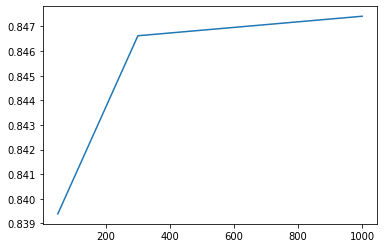

In [102]:
plt.plot(num_trees,cvres)

In [103]:
rf = RandomForestClassifier(n_estimators = 300,random_state=5).fit(X_train,y_train)

In [104]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1742
           1       0.83      0.88      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.86      0.86      0.85      3349
weighted avg       0.86      0.85      0.85      3349

